In [3]:
#import libraries
import pandas as pd
import numpy as np
import os
from datetime import datetime
# Plot


# 1.Introduction

# 2.Data distribution

## 2.1Correlation map

# 3.Prediction

## 3.1 BTC
### 3.1.1 Linear Regression
### 3.1.2 Arima


## 3.2 ETH
## 3.3 ADA



In [4]:
pwd

'/Users/fangya/HU/3.Kaggle'

In [5]:
info = pd.read_csv("/Users/fangya/HU/3.Kaggle/G crypto/asset_details.csv")

In [6]:
info.head()

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic


In [7]:
ctrain = pd.read_csv("/Users/fangya/HU/3.Kaggle/G crypto/train.csv")
ctrain.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


# BTC
bitcoin

In [15]:
btc= ctrain[ctrain["Asset_ID"]==1].set_index("timestamp")
btc.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956200 entries, 1514764860 to 1632182400
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Asset_ID  1956200 non-null  int64  
 1   Count     1956200 non-null  float64
 2   Open      1956200 non-null  float64
 3   High      1956200 non-null  float64
 4   Low       1956200 non-null  float64
 5   Close     1956200 non-null  float64
 6   Volume    1956200 non-null  float64
 7   VWAP      1956200 non-null  float64
 8   Target    1955860 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 149.2 MB


## ETC

In [8]:
eth = ctrain[ctrain["Asset_ID"]==6].set_index("timestamp")
eth.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956200 entries, 1514764860 to 1632182400
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Asset_ID  1956200 non-null  int64  
 1   Count     1956200 non-null  float64
 2   Open      1956200 non-null  float64
 3   High      1956200 non-null  float64
 4   Low       1956200 non-null  float64
 5   Close     1956200 non-null  float64
 6   Volume    1956200 non-null  float64
 7   VWAP      1956200 non-null  float64
 8   Target    1955860 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 149.2 MB


In [9]:
import matplotlib.pyplot as plt

In [10]:
import time

In [11]:
from sklearn.preprocessing import StandardScaler

In [13]:
# ETH start date
eth_st =eth.index[0].astype("datetime64[s]")
eth_end =eth.index[-1].astype("datetime64[s]")
print ("Etherum data started from" , eth_st, "to" , eth_end)

Etherum data started from 2018-01-01T00:01:00 to 2021-09-21T00:00:00


In [23]:
# reindex for missing value
eth=eth.reindex(range(eth.index[0],eth.index[-1]+60,60), method="pad")
(eth.index[1:] -eth.index[:-1]).value_counts().head()

60    1956959
Name: timestamp, dtype: int64

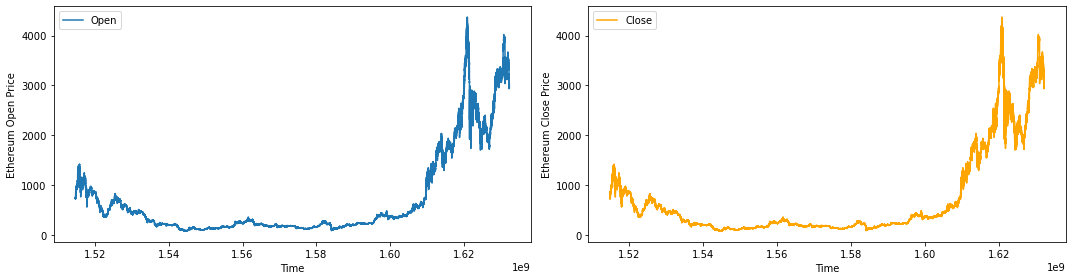

In [14]:
# ETH visualization
# 1. open price
# 2. close price
f= plt.figure(figsize=(15,4))

ax1= f.add_subplot(121)
plt.plot(eth["Open"], label="Open")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Ethereum Open Price")

ax2= f.add_subplot(122)
plt.plot(eth["Close"], label="Close", color="orange")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Ethereum Close Price")

plt.tight_layout()
plt.show()

# ADA

In [16]:
ada = ctrain[ctrain["Asset_ID"]==3].set_index("timestamp")
ada.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1791867 entries, 1523956260 to 1632182400
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Asset_ID  1791867 non-null  int64  
 1   Count     1791867 non-null  float64
 2   Open      1791867 non-null  float64
 3   High      1791867 non-null  float64
 4   Low       1791867 non-null  float64
 5   Close     1791867 non-null  float64
 6   Volume    1791867 non-null  float64
 7   VWAP      1791867 non-null  float64
 8   Target    1773136 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 136.7 MB


In [19]:
# ETH start date
ada_st =ada.index[0].astype("datetime64[s]")
ada_end =ada.index[-1].astype("datetime64[s]")
print ("Carnado data started from" , ada_st, "to" , ada_end)

(ada.index[1:] -ada.index[:-1]).value_counts().head()

Carnado data started from 2018-04-17T09:11:00 to 2021-09-21T00:00:00


60     1782506
120       7848
180       1090
240        270
300         79
Name: timestamp, dtype: int64

In [22]:
# reindex for missing value
ada=ada.reindex(range(ada.index[0],ada.index[-1]+60,60), method="pad")
(ada.index[1:] -ada.index[:-1]).value_counts().head()

60    1803769
Name: timestamp, dtype: int64

In [25]:
# Plot Price History
totimestamp= lambda s: np.int32(time.mktime(datetime.strptime(s, "%d/%m/%Y").timetuple()))

# create intervals
eth_2021=eth.loc[totimestamp("01/01/2021") : totimestamp("21/09/2021")]
ada_2021=ada.loc[totimestamp("01/01/2021") : totimestamp("21/09/2021")]

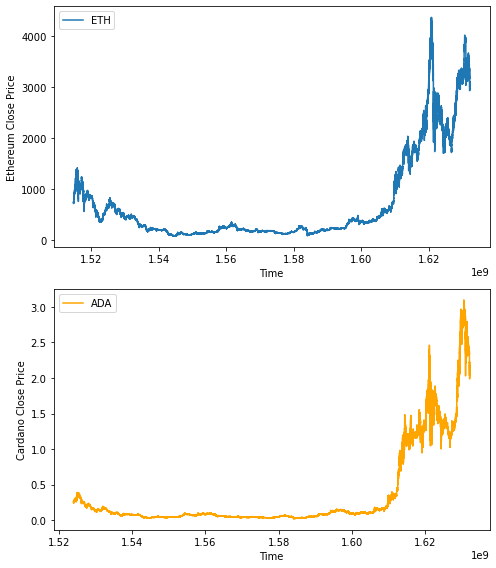

In [28]:
# ETH ADA visualization close price in 2021
f= plt.figure(figsize=(7,8))

ax11= f.add_subplot(211)
plt.plot(eth["Close"], label="ETH")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Ethereum Close Price")

ax22= f.add_subplot(212)
plt.plot(ada["Close"], label="ADA", color="orange")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Cardano Close Price")

plt.tight_layout()
plt.show()

Correlation Plot for all Asset in 2021

In [38]:
#log return
def log_return(series, periods=1):
    return np.log(series).diff(periods=periods)

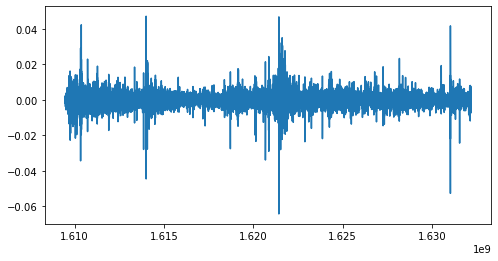

In [42]:
import scipy.stats as stats
lret_eth=log_return(eth_2021.Close)[1:]
lret_eth.rename("Eth Log Return", inplace=True)
plt.figure(figsize=(8,4))
plt.plot(lret_eth)
plt.show()

In [48]:
all2021=pd.DataFrame([])
for asset_id, asset_name in zip(info.Asset_ID, info.Asset_Name):
    asset=ctrain[ctrain["Asset_ID"]==asset_id].set_index("timestamp")
    asset=asset.loc[totimestamp("01/01/2021"):totimestamp("21/09/2021")]
    asset=asset.reindex(range(asset.index[0],asset.index[-1]+60,60), method="pad")
    lret=log_return(asset.Close.fillna(0))[1:]
    all2021=all2021.join(lret,rsuffix=asset_name,how="outer")
    

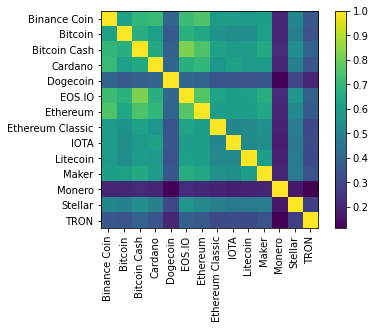

In [49]:
plt.imshow(all2021.corr());
plt.yticks(info.Asset_ID, info.Asset_Name.values)
plt.xticks(info.Asset_ID, info.Asset_Name.values,rotation="vertical");
plt.colorbar()